<a href="https://colab.research.google.com/github/liebesbachlein/ml_t1d/blob/main/ML_2024_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**Data processing**

In [ ]:
'''
from dataclasses import dataclass

df = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/CGM_data_device.csv')

df["DeviceTm"] = pd.to_timedelta(df["DeviceTm"])


@dataclass
class Entry:
  features_df: pd.core.frame.DataFrame
  pt: int
  dt: int

  def __str__(self):
      return f"PtID:{self.pt}\n Features DF\n{self.features_df}\n"

def createData(data, features, column_names): #features = [(22, 30), {23, 30}]
  if len(column_names) != len(features) + 2:
    print("Features don't match column names")
    return -1
  a = []                                # PtID, TargetDt, Feature0, Feature1, ..., Target
  for i in range(len(column_names)):
    a.append([])
  for entry in data:
      F = []
      check = 0
      for feature in features:
        f = isFeature(entry, feature)
        if f == -1:
          check = 1
          break
        F.append(f)
      if check == 1:
        continue
      a[0].append(entry.pt)
      a[1].append(entry.dt)
      for i in range(len(features)):
        a[i + 2].append(F[i])
  A = pd.DataFrame(np.array(a).T, columns=column_names)
  A['PtID'] = A['PtID'].astype(int)

  return A

def isFeature(entry, time):
  features_tm_bg = entry.features_df.values[:, 2:4]
  for x, y in features_tm_bg:
    hours = x.seconds//3600
    minutes = (x.seconds - hours*3600) // 60
    if hours == time[0]:
      if abs(time[1] - minutes) <= 5:
        return y
  return -1

In [ ]:
'''############################### features

groups_pt = [] # [ Pt=1[ ( (Date), (DataFrame) ) , ... ], Pt=2[ ( (Date), (DataFrame) ) , ... ], ...
for x, y in df.groupby('PtID'):
  group_pt = []
  for data_pt in y.groupby('DeviceDtTmDaysFromEnroll'):
    group_pt.append(data_pt)
  groups_pt.append(group_pt)

data = [] #            [[Features_DataFrame0, Target_DataFrame0], ...]
          # groups_dt  [( (Date), (DataFrame) ) , ...] per patient's all data
          # group      [(Data), DataFrame]
print('1')
for groups_dt in groups_pt:
  for group in groups_dt:
      features_df = group[1]
      entry = Entry(features_df, features_df['PtID'].iloc[0], features_df['DeviceDtTmDaysFromEnroll'].iloc[0])
      data.append(entry)

features = []
cols = ['PtID','Dt']
hh = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
mm = [0, 10, 20, 30, 40, 50]
for h in hh:
  for m in mm:
    features.append([h, m])
    cols.append('f' + str(h) + ':' + str(m))

print('2')

A = createData(data, features, cols)

A = A.dropna()
A['PtID'] = A['PtID'].astype(int)

A.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/6_to_24_cgm_sorted.csv', index=False)

#A.shape  ->  (30162, 110)


1
2


In [ ]:
#df = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/6_to_24_cgm_sorted.csv')

In [ ]:
#df.head(100)

,PtID,Dt,f6:0,f6:10,f6:20,f6:30,f6:40,f6:50,f7:0,f7:10,...,f22:20,f22:30,f22:40,f22:50,f23:0,f23:10,f23:20,f23:30,f23:40,f23:50
0,2,1.0,7.2,7.2,7.5,7.7,7.8,7.8,7.9,7.9,...,16.2,17.0,17.8,17.4,18.4,18.7,19.1,18.7,19.3,19.5
1,2,2.0,19.3,19.1,19.1,18.8,18.4,18.3,18.6,18.6,...,2.9,3.7,4.3,4.7,4.3,4.2,3.8,3.7,3.1,2.7
2,2,3.0,6.4,6.5,6.2,6.1,6.0,6.0,6.0,6.0,...,4.7,4.4,4.2,3.9,3.9,3.9,3.9,3.8,4.2,5.9
3,2,4.0,9.0,8.8,9.4,9.4,9.2,9.3,9.2,9.2,...,6.5,6.5,6.6,6.8,7.3,7.3,7.3,7.2,7.2,7.1
4,2,5.0,8.8,8.9,9.0,9.1,8.9,8.9,9.2,9.3,...,14.5,14.4,14.7,14.7,14.9,14.8,14.8,14.6,14.5,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,124.0,6.7,6.7,6.0,5.9,5.8,5.9,6.0,6.0,...,10.3,10.7,11.0,11.7,11.3,11.4,11.0,11.4,11.7,11.2
96,2,125.0,7.9,7.9,7.7,7.5,7.4,7.7,7.6,7.5,...,6.4,6.3,6.0,6.0,5.8,5.7,5.4,5.3,5.2,5.0
97,2,126.0,4.9,4.6,4.9,4.9,4.8,4.8,4.6,4.7,...,9.2,9.4,9.6,9.7,9.9,10.0,10.3,9.9,9.9,10.2
98,2,128.0,9.7,11.2,11.9,12.4,12.0,12.3,12.4,12.0,...,6.3,6.3,6.2,6.1,5.8,6.0,6.2,6.3,6.0,5.9


In [ ]:
#from scipy.signal import savgol_filter

In [ ]:
'''cols = []
hh = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
mm = [0, 10, 20, 30, 40, 50]
for h in hh:
  for m in mm:
    cols.append('f' + str(h) + ':' + str(m))

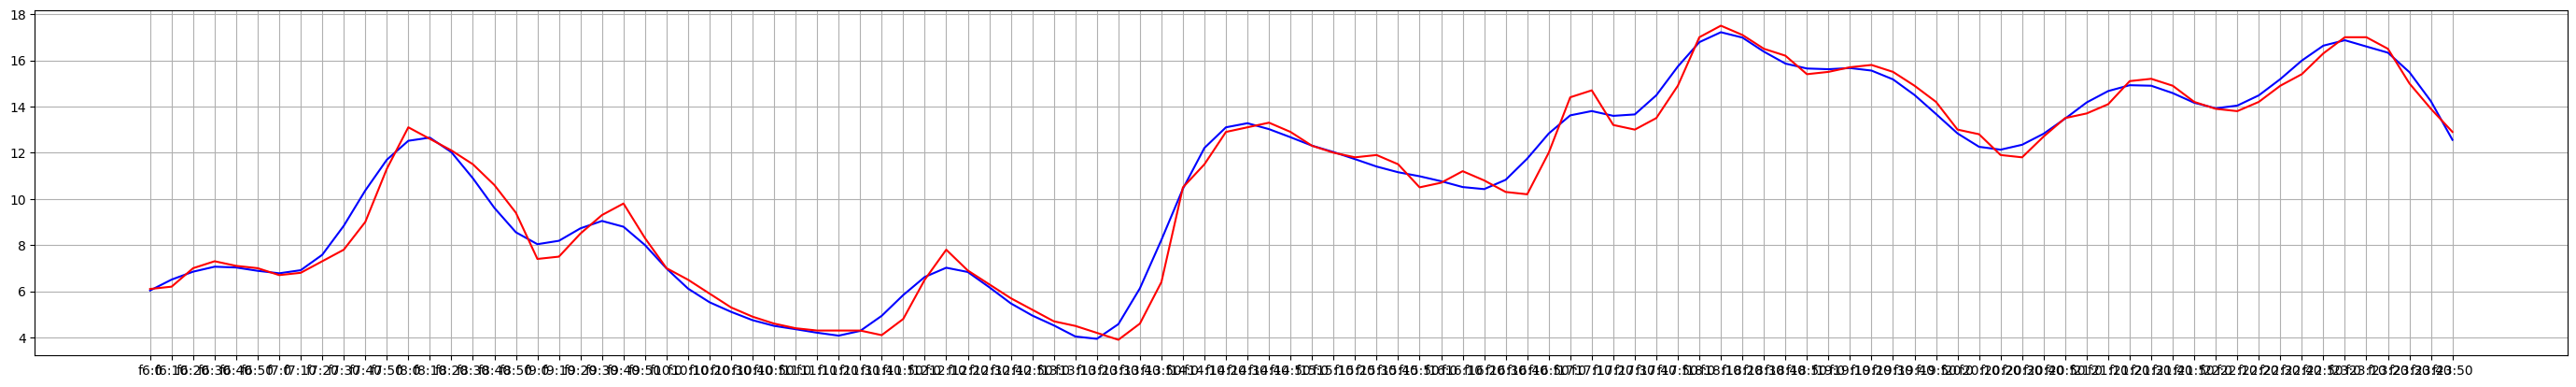

In [ ]:
'''c = df.drop(columns=['PtID', 'Dt']).iloc[1546]
s = savgol_filter(x=c, window_length=5, polyorder=2)
s = savgol_filter(x=s, window_length=8, polyorder=2)

fig, ax = plt.subplots()
fig.set_figwidth(35)
ax.plot(cols, s, '-', color='b', label='smooth')
ax.plot(cols, c, '-', color='r', label='orig')
plt.grid()
plt.show()

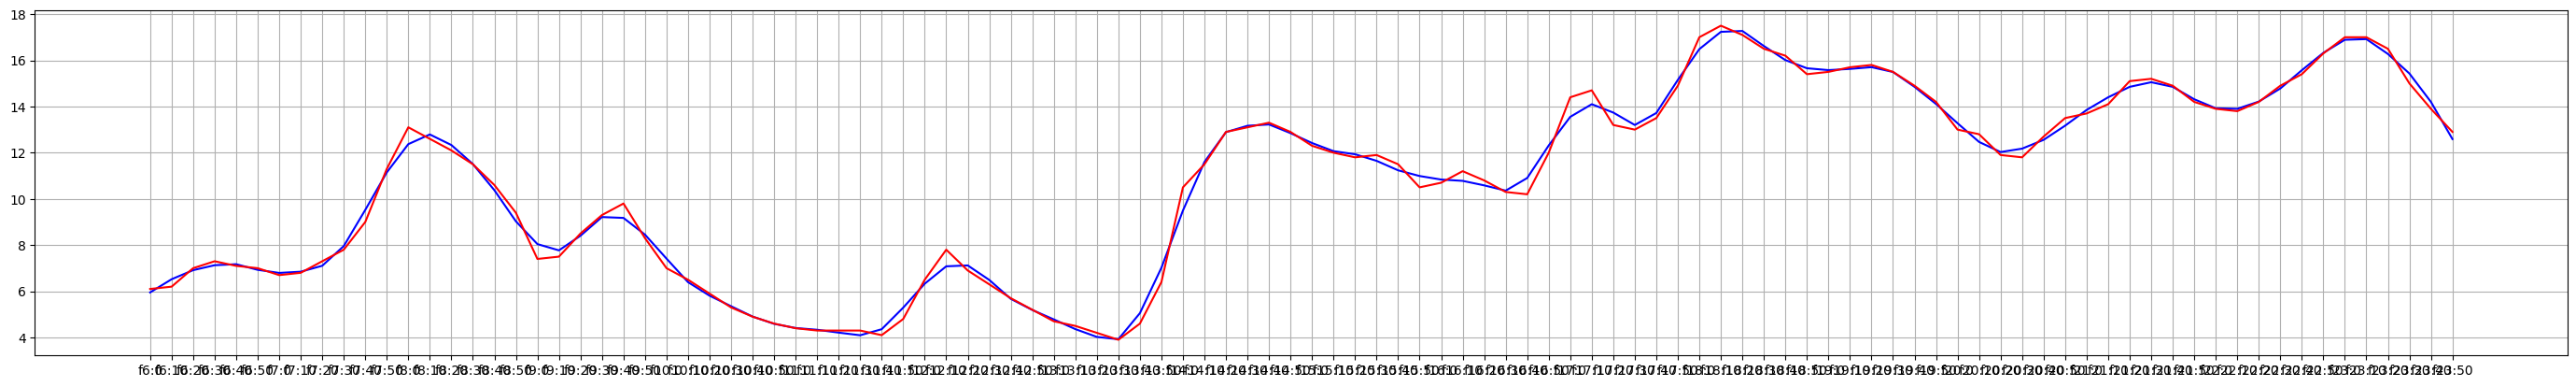

In [ ]:
'''c = df.drop(columns=['PtID', 'Dt']).iloc[1546]
s = savgol_filter(x=c, window_length=7, polyorder=2)

fig, ax = plt.subplots()
fig.set_figwidth(35)
ax.plot(cols, s, '-', color='b', label='smooth')
ax.plot(cols, c, '-', color='r', label='orig')
plt.grid()
plt.show()

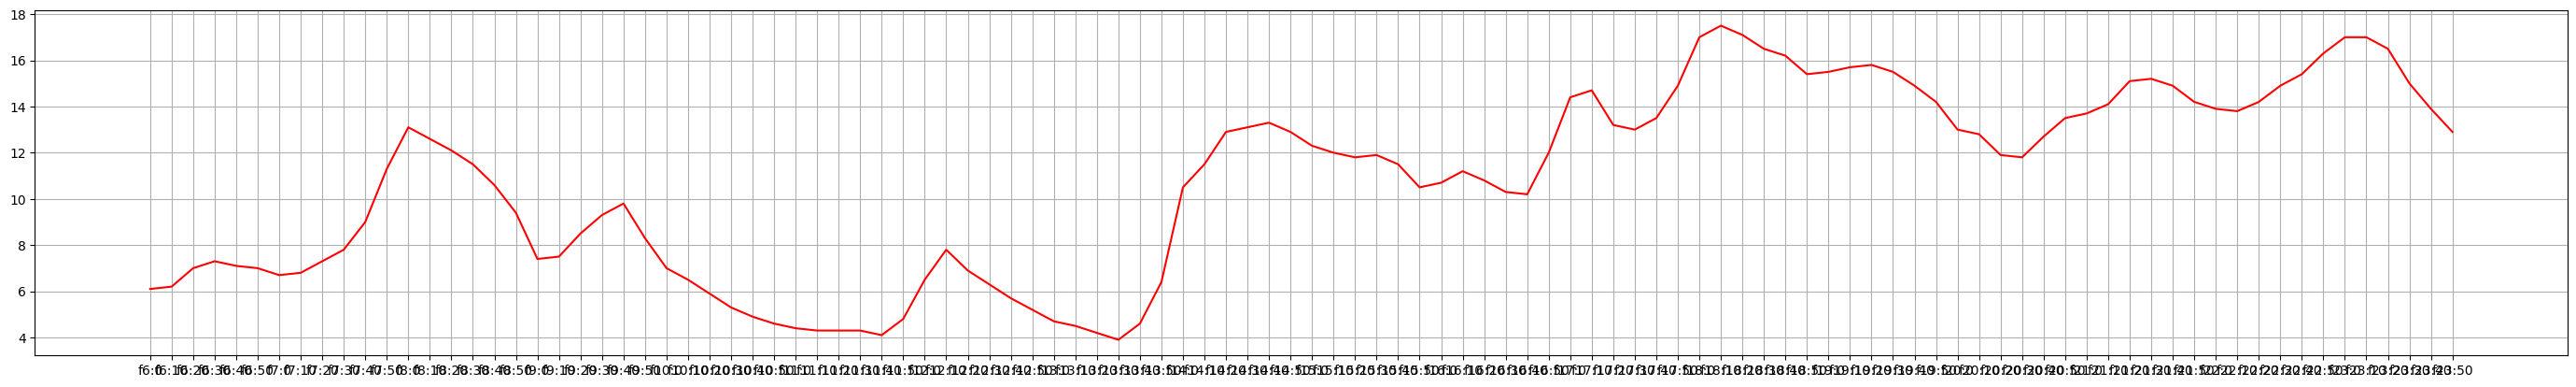

In [ ]:
'''c = df.drop(columns=['PtID', 'Dt']).iloc[1546]

fig, ax = plt.subplots()
fig.set_figwidth(35)
ax.plot(cols, c, '-', color='r', label='orig')
plt.grid()
plt.show()

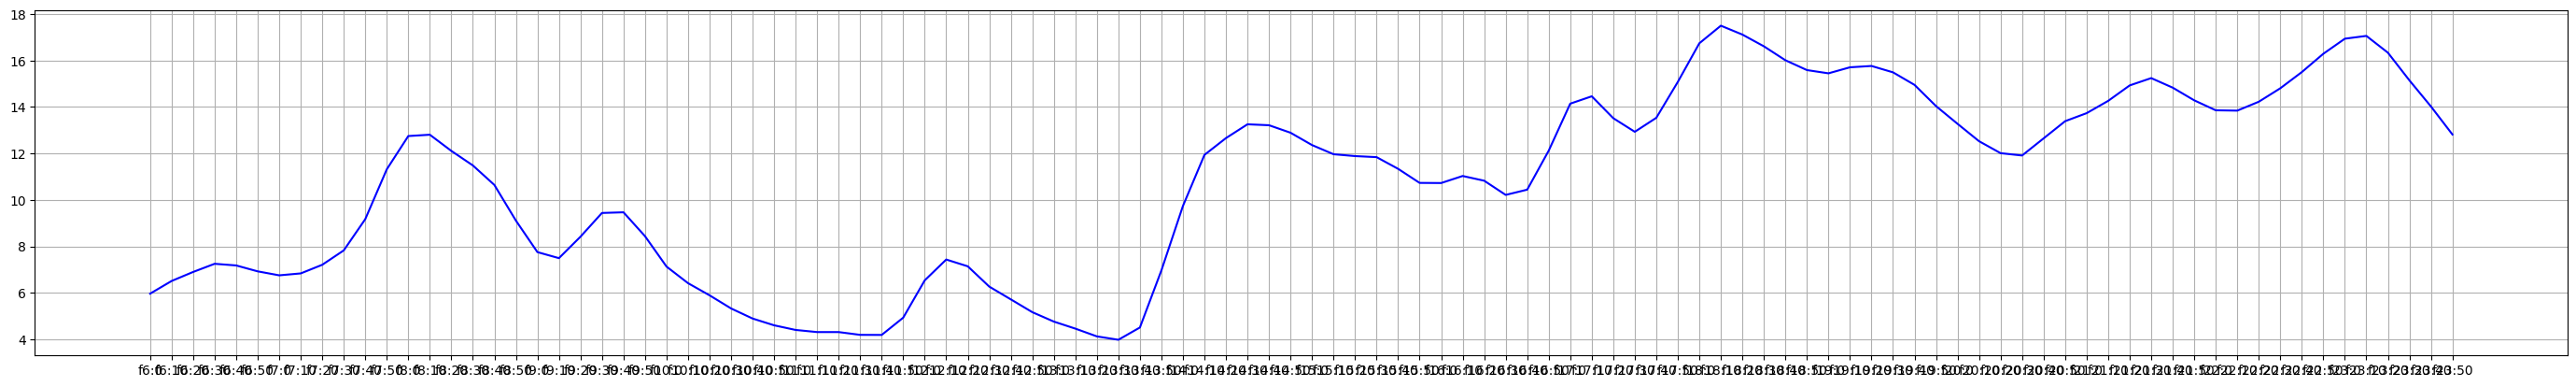

In [ ]:
'''c = df.drop(columns=['PtID', 'Dt']).iloc[1546]
s = savgol_filter(x=c, window_length=5, polyorder=2)

fig, ax = plt.subplots()
fig.set_figwidth(35)
ax.plot(cols, s, '-', color='b', label='smooth')
#ax.plot(cols, c, '-', color='r', label='orig')
plt.grid()
plt.show()

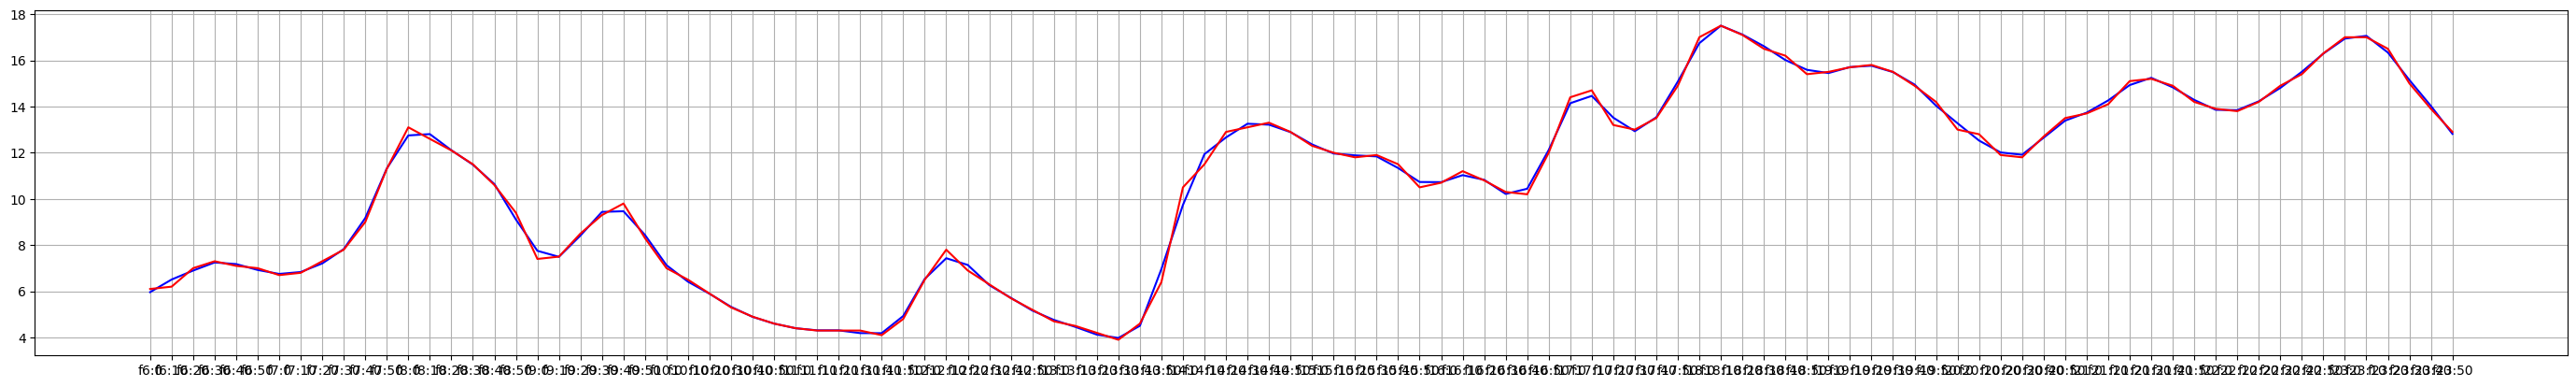

In [ ]:
'''c = df.drop(columns=['PtID', 'Dt']).iloc[1546]
s = savgol_filter(x=c, window_length=5, polyorder=2)

fig, ax = plt.subplots()
fig.set_figwidth(35)
ax.plot(cols, s, '-', color='b', label='smooth')
ax.plot(cols, c, '-', color='r', label='orig')
plt.grid()
plt.show()

In [ ]:
'''df_val = df.drop(columns=['PtID', 'Dt'])
data = []
for i in range(df.shape[0]):
  c = df_val.iloc[i]
  s = savgol_filter(x=c, window_length=7, polyorder=2)
  data.append(s)

In [ ]:
'''columns = ['PtID', 'Dt']
for c in cols:
  columns.append(c)
B = pd.DataFrame(data, columns=cols)
B.insert(0, 'Dt', df['Dt'])
B.insert(0, 'PtID', df['PtID'])
C = pd.DataFrame(B.values, columns=columns)

In [ ]:
#C.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/6_to_24_cgm_sorted_smooth_big.csv', index=False)

In [ ]:
'''data_rounded = []
for dd in data:
  new = []
  for d in dd:
    new.append(round(d, 1))
  data_rounded.append(new)

In [ ]:
'''D = pd.DataFrame(data_rounded, columns=cols)
D.insert(0, 'Dt', df['Dt'])
D.insert(0, 'PtID', df['PtID'])
E = pd.DataFrame(D.values, columns=columns)

In [ ]:
#E.head(10)

,PtID,Dt,f6:0,f6:10,f6:20,f6:30,f6:40,f6:50,f7:0,f7:10,...,f22:20,f22:30,f22:40,f22:50,f23:0,f23:10,f23:20,f23:30,f23:40,f23:50
0,2.0,1.0,7.1,7.3,7.5,7.6,7.8,7.9,7.8,7.7,...,16.5,17.0,17.4,17.9,18.3,18.6,18.9,19.2,19.3,19.4
1,2.0,2.0,19.4,19.1,18.9,18.7,18.5,18.4,18.5,18.7,...,3.2,3.7,4.1,4.5,4.4,4.2,3.9,3.5,3.2,2.7
2,2.0,3.0,6.5,6.3,6.2,6.1,6.0,6.0,6.0,6.0,...,4.7,4.4,4.2,4.0,3.9,3.8,3.7,4.1,4.7,5.5
3,2.0,4.0,8.9,9.1,9.2,9.3,9.4,9.2,9.2,9.3,...,6.8,6.5,6.6,6.9,7.1,7.3,7.3,7.3,7.2,7.0
4,2.0,5.0,8.8,8.9,8.9,9.0,9.0,9.0,9.1,9.3,...,14.5,14.5,14.6,14.7,14.8,14.8,14.8,14.7,14.6,14.4
5,2.0,6.0,4.9,4.7,4.4,4.2,4.0,3.8,3.7,3.8,...,12.4,12.7,13.4,14.2,15.0,15.5,15.3,15.4,15.4,15.4
6,2.0,8.0,6.5,6.8,7.0,7.1,6.9,6.5,6.3,6.4,...,10.0,9.9,9.9,10.0,9.9,9.7,9.5,9.4,9.4,9.5
7,2.0,10.0,8.1,8.4,8.5,8.6,8.5,8.4,8.4,8.3,...,10.0,10.1,10.2,10.4,10.6,10.8,10.9,11.0,11.0,10.9
8,2.0,11.0,13.7,14.0,14.1,14.1,14.0,13.6,13.0,12.7,...,3.5,3.6,4.0,4.8,5.5,6.0,6.1,6.3,6.4,6.5
9,2.0,12.0,6.2,6.3,6.4,6.4,6.4,6.4,6.3,6.2,...,7.5,7.3,7.0,6.8,6.4,6.1,5.7,5.7,5.8,6.1


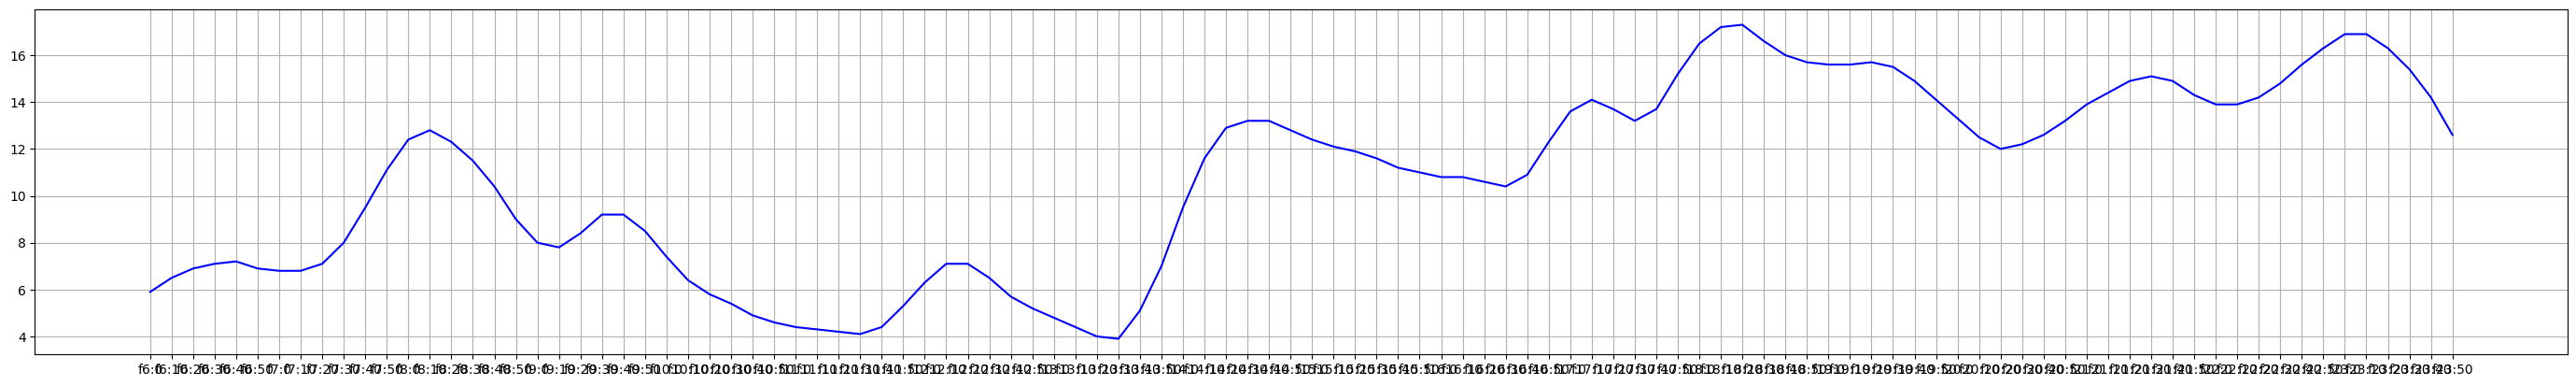

In [ ]:
'''c = df.drop(columns=['PtID', 'Dt']).iloc[1546]
s = E.drop(columns=['PtID', 'Dt']).iloc[1546]
fig, ax = plt.subplots()
fig.set_figwidth(35)
ax.plot(cols, s, '-', color='b', label='smooth')
#ax.plot(cols, c, '-', color='r', label='orig')
plt.grid()
plt.show()

In [ ]:
#E.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/6_to_24_cgm_sorted_smooth_1dec.csv', index=False)

In [ ]:
#df_bg = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/iBGM.csv')

In [ ]:

df_bg['DeviceTm'] =  pd.to_timedelta(df_bg["DeviceTm"])

hh = dict()
for i in range(6, 24):
    hh[i] = 'f' + str(i) + ':'

mm = dict()
for i in [0, 10, 20, 30, 40, 50]:
    mm[i] = str(i)

cols = []
for i in hh.keys():
    for j in mm.keys():
        cols.append(hh[i] + mm[j])

def isGV(tm, gv, r):
    hours = tm.seconds//3600
    minutes = (tm.seconds - hours*3600) // 600
    minutes = minutes * 10
    if hours not in hh.keys():
        return r
    else:
        ss = hh[hours] + mm[minutes]
        if r[ss] == 0:
            r[ss] = gv
        else:
            r[ss] = (gv + r[ss]) / 2
        return r

arr = []
pt = []
dt = []

for x, y in df_bg.groupby('PtID'):
    for k, l in y.groupby('DeviceDtTmDaysFromEnroll'):
        row = dict()
        for i in cols:
            row[i] = 0
        for tm, h in l.groupby('DeviceTm'):
            row = isGV(tm, h['GlucoseValue'].iloc[0], row)
        pt.append(x)
        dt.append(k)
        arr.append(list(row.values()))

dd = pd.DataFrame(arr, columns = cols)
dd.insert(0, 'Dt', dt)
dd.insert(0, 'PtID', pt)



In [ ]:
'''data_rounded = []
for dd in arr:
  new = []
  for d in dd:
    new.append(round(d, 1))
  data_rounded.append(new)
dd = pd.DataFrame(data_rounded, columns = cols)
dd.insert(0, 'Dt', dt)
dd.insert(0, 'PtID', pt)

In [ ]:
#dd.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/inter_bg_6_to_24.csv', index=False)

In [ ]:
#dd.values[124]

array([ 2. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  7.7,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 13.4,
        0. ,  0. , 14.3,  0. ,  0. , 15.6,  0. ,  0. ,  0. ,  0. ,  0. ])

In [ ]:
#E.values[0]

array([ 2. ,  1. ,  7.1,  7.3,  7.5,  7.6,  7.8,  7.9,  7.8,  7.7,  7.6,
        7.4,  7.1,  7.1,  7.2,  7.2,  7.2,  7.3,  7.3,  7.4,  7.3,  7.2,
        7.1,  6.9,  7. ,  7.2,  7.4,  7.7,  7.8,  7.7,  8.4,  9.7, 10.9,
       11.6, 11.6, 11.1, 10.7, 10.2,  9.6,  9.3,  8.9,  8.5,  8. ,  7.5,
        7.3,  7.8,  8.7,  9.8, 10.6, 11.2, 11.2, 11.1, 10.5, 10.1,  9.5,
        8.8,  8.3,  8. ,  7.5,  7.4,  7.1,  6.8,  6.6,  6.3,  6. ,  5.7,
        5.5,  5.3,  5.3,  5.3,  5.2,  5. ,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.3,  5.1,  5.1,  5. ,  5.1,  5.3,  5.5,  5.9,  6.5,  7.3,  8.2,
        9.4, 10.4, 11.6, 12.7, 13.6, 14.4, 15.1, 15.2, 15. , 15. , 15.2,
       15.6, 16.5, 17. , 17.4, 17.9, 18.3, 18.6, 18.9, 19.2, 19.3, 19.4])

In [ ]:
'''
#Aligning data points

#IBG
df_ibg = dd
df_cgm = E

l = []
for pt, x in df_cgm.groupby('PtID'):
  for dt, y in x.groupby('Dt'):
    l.append((pt, dt))

arr = []
for pt, x in df_ibg.groupby('PtID'):
  for dt, y in x.groupby('Dt'):
    if (pt, dt) in l:
      arr.append(y.values[0])

df_ibg_new = pd.DataFrame(arr, columns=df_ibg.columns)

In [ ]:
'''
#Aligning data points

#CGM

l = []
for pt, x in df_ibg_new.groupby('PtID'):
  for dt, y in x.groupby('Dt'):
    l.append((pt, dt))

arr = []
for pt, x in df_cgm.groupby('PtID'):
  for dt, y in x.groupby('Dt'):
    if (pt, dt) in l:
      arr.append(y.values[0])

df_cgm_new = pd.DataFrame(arr, columns=df_cgm.columns)


df_ibg_new.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/inter_bg_6_to_24_aligned.csv', index=False)
df_cgm_new.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/cont_gm_6_to_24_aligned.csv', index=False)

In [ ]:
#df_ibg_new.shape

(29666, 110)

In [ ]:
#df_cgm_new.shape

(29666, 110)

In [ ]:
#df_ibg_new.values[11458]

array([112. ,  86. ,   0. ,   0. ,   0. ,   4.2,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   4.9,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         9.3,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   4.2,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ])

In [ ]:
#df_cgm_new.values[11458]

array([112. ,  86. ,   6. ,   6.2,   6.5,   6.8,   7.2,   7.6,   7.9,
         8.1,   7.9,   7.3,   6.7,   6.2,   6.1,   6.1,   6.2,   6.2,
         6.5,   7.1,   7.9,   8.6,   9.2,   9.5,   9.9,  10.2,  10.5,
        10.7,  10.9,  10.7,  10.3,   9.7,   9.3,   8.9,   8.9,   9. ,
         9. ,   8.8,   8.6,   8.4,   8.4,   8.6,   8.6,   8.3,   7.8,
         7. ,   6.3,   5.7,   4.8,   4. ,   3.4,   2.9,   2.6,   2.4,
         2.6,   3.3,   4.3,   5.3,   5.9,   6.1,   6.5,   7. ,   7.4,
         7.7,   7.8,   7.9,   8. ,   8. ,   7.8,   7.6,   7.4,   7.3,
         7. ,   6.8,   6.6,   6.5,   6.2,   5.5,   4.8,   4.2,   4. ,
         4.2,   4.2,   4.1,   4.2,   4.2,   4.4,   4.4,   4.5,   4.5,
         4.6,   4.7,   4.8,   4.8,   4.9,   4.8,   5.2,   5.9,   7. ,
         8.1,   8.9,   9.2,   9.4,   9.4,   9.3,   9.4,   9.6,   9.7,
         9.9,  10. ])

In [ ]:
'''df_ibg_new = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/inter_bg_6_to_24_aligned.csv')
df_cgm_new = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/cont_gm_6_to_24_aligned.csv')

arr_cgm = []
arr_ibg = []
for i in range(df_cgm_new.shape[0]):
  check = 0
  for j in range(2, df_cgm_new.shape[1]):
    if df_ibg_new.values[i][j] != 0 and abs(df_cgm_new.values[i][j] - df_ibg_new.values[i][j]) >= 1.8:
      check = 1
  if(check == 0):
    arr_cgm.append(df_cgm_new.values[i])
    arr_ibg.append(df_ibg_new.values[i])

In [ ]:
'''df_cgm_newer = pd.DataFrame(arr_cgm, columns=df_cgm_new.columns)
df_ibg_newer = pd.DataFrame(arr_ibg, columns=df_cgm_new.columns)

In [ ]:
#df_cgm_newer.shape

(16172, 110)

In [ ]:
#df_ibg_new.values[2545]

array([ 23. , 107. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   9.4,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         4.8,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   3.5,   3.3,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   9.8,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ])

In [ ]:
#df_cgm_new.values[2545]

array([ 23. , 107. ,  10.9,  10.4,   9.9,   9.6,   9.2,   9. ,   9. ,
         9.2,   9.4,   9.4,   9. ,   8.4,   7.7,   7.2,   6.7,   6.3,
         5.7,   5.1,   4.7,   4.4,   4.4,   4.3,   4.5,   4.8,   5.3,
         5.6,   5.6,   5.1,   4.8,   4.7,   4.7,   4.7,   4.6,   4.5,
         4.5,   4.4,   4.4,   4.3,   4.6,   4.9,   5.4,   5.9,   6.2,
         6.5,   6.9,   7.2,   7.7,   8.2,   8.3,   8.2,   8. ,   7.7,
         7.5,   7.5,   7.6,   7.4,   7.1,   6.8,   6.4,   6.1,   5.9,
         5.8,   5.6,   5.4,   4.9,   4.5,   4. ,   3.7,   3.4,   3.3,
         3.3,   3.5,   4.1,   4.6,   5. ,   5.2,   5.6,   6.1,   6.7,
         7.2,   7.5,   7.9,   8.5,   9. ,   9.1,   8.9,   8.5,   8.6,
         9.2,  10.2,  11.2,  11.2,  10.6,   9.4,   8. ,   6.9,   6.6,
         6.7,   7.2,   7.7,   7.9,   7.7,   7.3,   7.1,   6.9,   6.7,
         6.5,   6.3])

In [ ]:
'''df_ibg_newer.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/inter_bg_6_to_24_aligned_cleaned.csv', index=False)
df_cgm_newer.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/cont_gm_6_to_24_aligned_cleaned.csv', index=False)

In [ ]:
'''df_ibg = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/inter_bg_6_to_24_aligned_cleaned.csv')
df_cgm = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/cont_gm_6_to_24_aligned_cleaned.csv')

arr_cgm = []
arr_ibg = []
for i in range(df_cgm.shape[0]):
  check = 0
  for j in range(2, df_cgm.shape[1]):
    if df_ibg.values[i][j] != 0 and abs(df_cgm.values[i][j] - df_ibg.values[i][j]) >= 1.0:
      check = 1
  if(check == 0):
    arr_cgm.append(df_cgm.values[i])
    arr_ibg.append(df_ibg.values[i])

In [ ]:
'''df_cgm_newer = pd.DataFrame(arr_cgm, columns=df_cgm.columns)
df_ibg_newer = pd.DataFrame(arr_ibg, columns=df_cgm.columns)

In [ ]:
'''df_ibg_newer.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/inter_bg_6_to_24_aligned_cleaned_1mmL_max.csv', index=False)
df_cgm_newer.to_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/cont_gm_6_to_24_aligned_cleaned_1mmL_max.csv', index=False)

#**Data preparation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
import numpy as np

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv1D, MaxPooling1D, Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

In [ ]:
df_cgm = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/cont_gm_6_to_24_aligned_cleaned_1mmL_max.csv')
df_ibg = pd.read_csv('drive/MyDrive/Senior Project: Diabetes T1/Datasets/Dataset#2/Processed/inter_bg_6_to_24_aligned_cleaned_1mmL_max.csv')
arr = np.zeros(df_ibg.shape[0])
for i in range(20):
  df_ibg.insert(df_ibg.shape[1], 'None_' + str(i), arr)
  df_cgm.insert(df_cgm.shape[1], 'None_' + str(i), arr)
df_i = df_ibg.drop(columns=['PtID', 'Dt'])
df_c = df_cgm.drop(columns=['PtID', 'Dt'])

In [ ]:
print([df_cgm.shape, df_ibg.shape])

[(5748, 130), (5748, 130)]


In [ ]:
'''for i in df_i.columns:
  df_i[i] = df_i[i] / 30
  df_c[i] = df_c[i] / 30

In [ ]:
X_train, X_test, y_train, y_test = skm.train_test_split(df_i, df_c, test_size=0.2, random_state=0)
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
i = 155
print(df_c.values[i])
print(df_i.values[i])

[ 6.7  6.7  6.8  6.7  6.6  6.4  6.3  6.2  6.1  6.1  6.   5.9  5.9  6.1
  6.7  8.1  9.9 11.4 12.2 12.  11.2 10.3  9.9  9.9 10.1 10.3 10.7 11.1
 11.6 11.9 11.9 11.8 11.8 11.9 12.  12.  11.8 11.7 11.5 11.3 11.2 11.3
 11.3 11.3 11.4 11.3 11.3 11.5 11.6 11.6 11.4 11.  10.5 10.1  9.9  9.8
  9.8  9.9 10.2 10.8 11.5 12.1 12.3 12.1 11.8 11.5 11.2 11.2 11.3 11.6
 11.8 11.8 11.7 11.5 11.3 11.  10.7 10.4 10.3 10.3 10.4 10.3 10.4 10.7
 11.  11.4 11.7 11.8 11.9 12.  12.  11.9 11.6 11.4 11.1 10.6 10.4 10.
  9.7  9.4  9.   8.6  8.2  7.8  7.5  7.3  7.   6.8  0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0. ]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.1  6.9
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  12.3  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 11.4  0.   0.   0.   0.   0.  11.2  0.   0.   0.   0.   0.   0.   0.
  0.   0.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 